In [1]:
import os
import io
import sys
import re
import time
import math
import pickle

import numpy as np
import pandas as pd

from numpy import nan as Nan
from numpy import inf as inf
from tqdm import notebook as tqdm
from scipy.sparse import csr_matrix
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from matplotlib import ticker


In [2]:
from data_preprocessing import *

In [3]:
# nan_features = set()
# for number in range(15):
#     path_to_csv = 'groups_and_oxi_states_15_traj/df_step_{}.pkl'.format(number)
#     path_to_folder = 'groups_and_oxi_states_15_traj/df_step_{}/features'.format(number)
#     labels_df = load_csv(path_to_csv)
#     feature_list, cnt_of_nan_features = make_features(path_to_folder, number)
#     for i, feature in enumerate(feature_list):
#         labels_df['feature_' + str(i)] = feature.tolist()
#         if cnt_of_nan_features[i] != 0:
#             nan_features.add('feature_' + str(i))
#     path_to_save = 'groups_and_oxi_states_15_traj/df_features_step_{}.pkl'.format(number)
#     save_csv(labels_df, path_to_save)

In [4]:
# print(nan_features)

In [5]:
df = load_csv(f"groups_and_oxi_states_5_frames/df_features_step_0.pkl")
df = df.drop(['stru_label', 'stru_id', 'is_good'], axis = 1)

In [6]:
df_all_temps = load_csv(f"groups_and_oxi_states_for_all_temps/all_features.pkl")
df_all_temps = df_all_temps.drop(['stru_label', 'stru_id', 'temp', 'src_id', 'label', 'is_good'], axis = 1)

In [22]:
df_all_temps = load_csv(f"groups_and_oxi_states_for_all_temps/all_features.pkl")
df = load_csv(f"groups_and_oxi_states_5_frames/df_features_step_0.pkl")
df_starting_structures = load_csv(f"groups_and_oxi_states_starting_structure/starting_structure_with_features.pkl")


In [27]:
df_starting_structures = load_csv(f"/workspaces/material-project/groups_and_oxi_states_starting_structure/starting_structure.pkl")


In [28]:
df_starting_structures

,starting_structure,src_id,label,group,structure_A,structure_AM,structure_CAN,structure_CAMN,structure_A40,structure_AM40,structure_CAN40,structure_CAMN40
0,"[[ 1.32153288 1.18895218 -5.68072811] Li, [ 1...",1537475,Li24Al8N16,group_C,[[ 4.88498131e-15 -2.37341369e+00 -5.05736172e...,[[ 4.88498131e-15 -2.37341369e+00 -5.05736172e...,"[[ 1.32153288 1.18895218 -5.68072811] Al+, [ ...","[[ 1.32153288 1.18895218 -5.68072811] Al+, [ ...",[[ 5.55111512e-15 -2.71441762e+00 -5.78398608e...,[[ 5.55111512e-15 -2.71441762e+00 -5.78398608e...,"[[ 1.51140619 1.35977674 -6.4969156 ] Al+, [ ...","[[ 1.51140619 1.35977674 -6.4969156 ] Al+, [ ..."
1,"[[-0.00479086 3.35503311 4.52250316] Li, [-0...",153620,Li12W2N8,group_C,"[[4.95354828 3.35517504 0.99508662] S3-, [1.72...","[[4.95354828 3.35517504 0.99508662] S3-, [1.72...","[[-0.00479086 3.35503311 4.52250316] Al+, [-...","[[-0.00479086 3.35503311 4.52250316] Al+, [-...","[[5.61385252 3.80241734 1.12773092] S3-, [1.95...","[[5.61385252 3.80241734 1.12773092] S3-, [1.95...","[[-0.00542948 3.80225649 5.12534941] Al+, [-...","[[-0.00542948 3.80225649 5.12534941] Al+, [-..."
2,"[[ 2.27290189 2.36267885 -0.02995099] Cs, [-0...",245988,CsLi2I3,group_A,"[[2.27343355 2.36079622 5.4443088 ] S-, [-0.03...","[[2.27343355 2.36079622 5.4443088 ] S-, [-0.03...","[[ 2.27290189 2.36267885 -0.02995099] Al+, [-...","[[ 2.27290189 2.36267885 -0.02995099] Al+, [-...","[[1.8206897 1.89065449 4.3600997 ] S-, [-0.02...","[[1.8206897 1.89065449 4.3600997 ] S-, [-0.02...","[[ 1.82026392 1.8921622 -0.02398639] Al+, [-...","[[ 1.82026392 1.8921622 -0.02398639] Al+, [-..."
3,"[[ 5.98570078 -1.52879525 5.61832353] Li, [-1...",7024042,Li12Mo6O24,group_C,"[[ 2.53254287 -4.17384934 4.04110792] S2-, [2...","[[ 2.53254287 -4.17384934 4.04110792] S2-, [2...","[[ 5.98570078 -1.52879525 5.61832353] Al+, [-...","[[ 5.98570078 -1.52879525 5.61832353] Al+, [-...","[[ 2.98173242 -4.9141525 4.75786714] S2-, [2...","[[ 2.98173242 -4.9141525 4.75786714] S2-, [2...","[[ 7.04736661 -1.79995309 6.61482875] Al+, [-...","[[ 7.04736661 -1.79995309 6.61482875] Al+, [-..."
4,"[[-4.46952213 -3.44390532 -2.41685533] Li, [ 0...",2310701,Li4B4O8,group_C,"[[-2.68090776 -2.80154632 -1.79289366] S2-, [-...","[[-2.68090776 -2.80154632 -1.79289366] S2-, [-...","[[-4.46952213 -3.44390532 -2.41685533] Al+, [ ...","[[-4.46952213 -3.44390532 -2.41685533] Al+, [ ...","[[-3.39353823 -3.54624456 -2.26947502] S2-, [-...","[[-3.39353823 -3.54624456 -2.26947502] S2-, [-...","[[-5.65759645 -4.3593534 -3.05929622] Al+, [ ...","[[-5.65759645 -4.3593534 -3.05929622] Al+, [ ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
116,"[[-7.74466691 -0.5590302 -3.82097115] Li, [-3...",1526845,Li4Al4Ge4O20,group_D,"[[-7.27238726 -2.24625162 -1.27641556] S4-, [-...","[[-7.27238726 -2.24625162 -1.27641556] S4-, [-...","[[-7.74466691 -0.5590302 -3.82097115] Al+, [-...","[[-7.74466691 -0.5590302 -3.82097115] Al+, [-...","[[-9.57535638 -2.95757899 -1.68062199] S4-, [-...","[[-9.57535638 -2.95757899 -1.68062199] S4-, [-...","[[-10.19719428 -0.73606001 -5.03096977] Al+,...","[[-10.19719428 -0.73606001 -5.03096977] Al+,..."
117,"[[-0.33216904 0.76485016 7.37657397] Li, [-0...",33953,Li4Au4F16,group_E,"[[3.78617719 2.44984976 6.25886747] S-, [0.484...","[[3.78617719 2.44984976 6.25886747] S-, [0.484...","[[-0.33216904 0.76485016 7.37657397] Al+, [-...","[[-0.33216904 0.76485016 7.37657397] Al+, [-...","[[4.64963993 3.00855419 7.68624358] S-, [ 0.59...","[[4.64963993 3.00855419 7.68624358] S-, [ 0.59...","[[-0.40792239 0.93927929 9.05885043] Al+, [-...","[[-0.40792239 0.93927929 9.05885043] Al+, [-..."
118,"[[-0.43348087 4.69780501 -6.61058234] Li, [-0...",1536985,Li4I4O16,group_E,"[[ 2.23968466 6.93525253 -7.38314801] S-, [ 2...","[[ 2.23968466 6.93525253 -7.38314801] S-, [ 2...","[[-0.43348087 4.69780501 -6.61058234] Al+, [-...","[[-0.43348087 4.69780501 -6.61058234] Al+, [-...","[[ 2.86700283 8.87776256 -9.45111007] S-, [ 3...","[[ 2.86700283 8.87776256 -9.45111007] S-, [ 3..

In [8]:
splits = [42]
roc_auc = []
scaler = StandardScaler()

for random_split in splits:
    for df in [df]:
        X, y = (df.drop(['is_good', 'stru_label', 'stru_id'], axis=1), df['is_good'])
        X_scaled = scaler.fit_transform(X)
        y = y.astype(int)
        X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
        model = CatBoostClassifier(eval_metric='AUC', verbose = False)
        feature_names = ['F{}'.format(i) for i in range(np.array(X_tr).shape[1])]
        test_pool = Pool(np.array(X_te), y_te, feature_names=feature_names)
        summary = model.select_features(
        X = X_tr,
        y=y_tr,
        eval_set=test_pool,
        features_for_select= np.arange(len(X_tr[0])),
        num_features_to_select=50,
        steps=6,
        algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,
        logging_level='Silent',
        plot=False)
        y_pred = model.predict_proba(X_te)[:, 1]
        print(f"roc auc score {roc_auc_score(y_te, y_pred)}")
        indexes = np.argsort(model.predict_proba(X_te)[:, 1])
        break

roc auc score 0.8620689655172413


In [9]:
df.shape

(116, 670)

In [10]:
from matplotlib import colors as mcolors
from random import shuffle

target_color = ['lightgreen' if v == 1 else 'pink' for v in y]
traj_color = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
traj_color = list(traj_color.keys())
shuffle(traj_color)
traj_color = traj_color[:len(y)]

In [11]:
first_feature, second_feature, third_feature = np.argsort(model.get_feature_importance())[::-1][:3]

In [12]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(7, 7), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    return ax


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


In [13]:
traj_color = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
traj_color = list(traj_color.keys())

In [14]:
traj_color =dict(zip(df_all_temps['stru_id'].unique(), traj_color))

In [15]:
df_all_temps['colors'] = df_all_temps['stru_id'].apply(lambda x: traj_color[x])

In [16]:
df_all_temps['colors'] = df_all_temps['stru_id'].apply(lambda x: traj_color[x])
colors = df_all_temps['colors'].to_list()

In [17]:
df_all_temps['temp'].unique()

array([1000.,  750.,  600.,  500.])

In [18]:
colors

['b',
 'g',
 'r',
 'r',
 'r',
 'r',
 'c',
 'm',
 'y',
 'k',
 'w',
 'aliceblue',
 'antiquewhite',
 'antiquewhite',
 'antiquewhite',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'azure',
 'azure',
 'azure',
 'beige',
 'bisque',
 'bisque',
 'bisque',
 'bisque',
 'black',
 'black',
 'black',
 'black',
 'blanchedalmond',
 'blue',
 'blue',
 'blue',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'crimson',
 'crimson',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkcyan',
 'darkcyan',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgreen',
 'darkgreen',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkkhaki',
 'darkkhaki',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkolivegreen',
 'darkolivegreen',
 'darkolivegreen',
 'darkorange',
 'darkorange',
 'darkorange',
 'darkorange',
 'darkorchid',
 'darkorchid',
 'darkorchid',
 'darkorchid',
 'darkred',
 'darksalmon'

In [19]:
def color(x):
    if x == 1000:
        return 'aquamarine'
    if x == 750:
        return 'r'
    if x == 600:
        return 'g'
    if x == 500:
        return 'b'
    

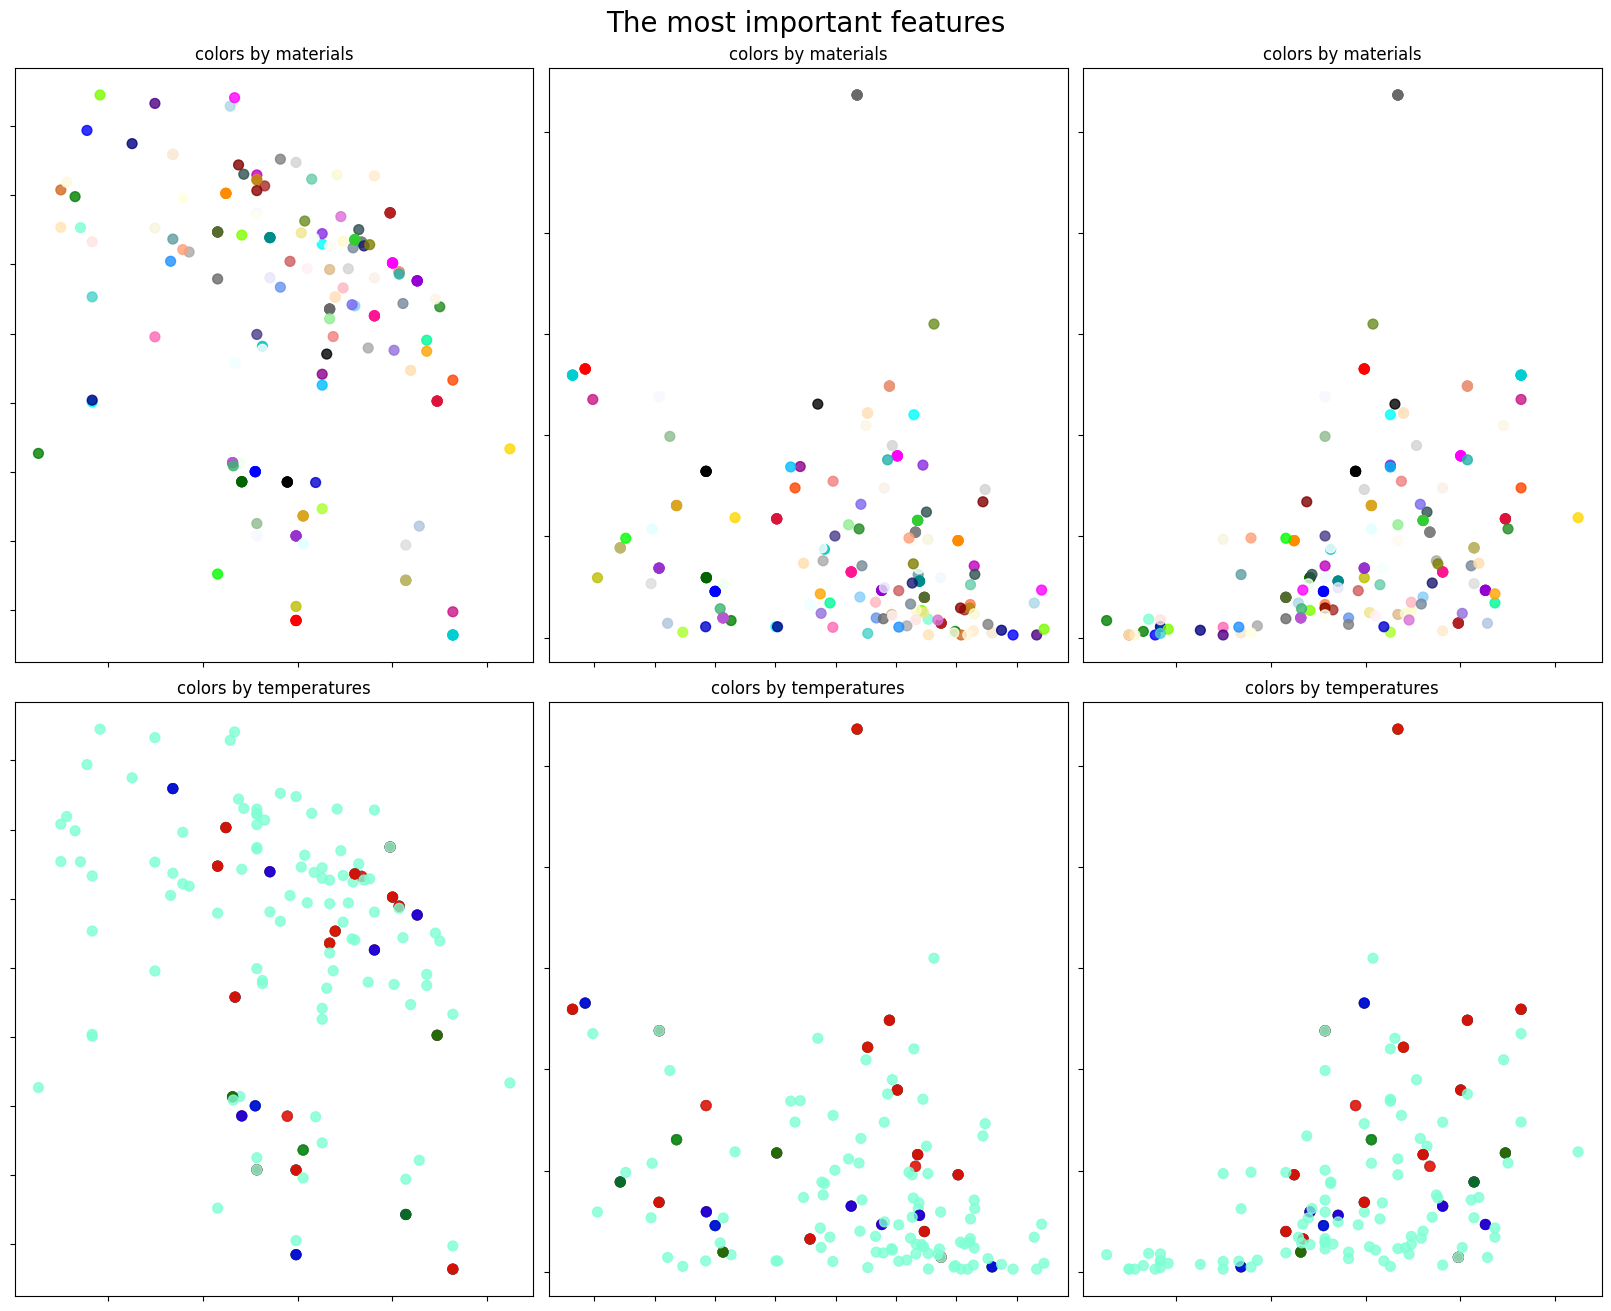

In [29]:
fig, axs = plt.subplots(
    nrows=2, ncols=3, figsize=(16, 13), facecolor="white", constrained_layout=True
)

fig.suptitle('The most important features', fontsize=20)

df_all_temps['colors'] = df_all_temps['stru_id'].apply(lambda x: traj_color[x])
colors = df_all_temps['colors'].to_list()

df_all_temps['colors'] = df_all_temps['temp']

X, y = (df_all_temps.drop(['stru_label', 'stru_id', 'temp', 'src_id', 'label', 'is_good', 'colors'], axis=1), df_all_temps['is_good'])
target_color = df_all_temps['temp'].apply(lambda x: color(x))
# traj_color = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# traj_color = list(traj_color.keys())
# shuffle(traj_color)
# traj_color = traj_color[:len(y)]
X_scaled = scaler.fit_transform(X)
y = y.astype(int)
x_1 = X_scaled[:, first_feature]
x_2 = X_scaled[:, second_feature]
x_3 = X_scaled[:, third_feature]

add_2d_scatter(axs[0][0], np.array([x_2, x_1]), colors, "colors by materials")
add_2d_scatter(axs[0][1], np.array([x_1, x_3]), colors, "colors by materials")
add_2d_scatter(axs[0][2], np.array([x_2, x_3]), colors, "colors by materials")
    
add_2d_scatter(axs[1][0], np.array([x_2, x_1]), target_color, "colors by temperatures")
add_2d_scatter(axs[1][1], np.array([x_1, x_3]), target_color, "colors by temperatures")
add_2d_scatter(axs[1][2], np.array([x_2, x_3]), target_color, "colors by temperatures")


# X, y = (df.drop(['is_good', 'stru_label', 'stru_id'], axis=1), df['is_good'])
# target_color = ['darkgreen' if v == 1 else 'red' for v in y]
# X_scaled = scaler.fit_transform(X)
# y = y.astype(int)
# x_1 = X_scaled[:, first_feature]
# x_2 = X_scaled[:, second_feature]
# x_3 = X_scaled[:, third_feature]
# add_2d_scatter(axs[0], np.array([x_2, x_1]), target_color, "for targets")
# add_2d_scatter(axs[1], np.array([x_1, x_3]), target_color, "for targets")
# add_2d_scatter(axs[2], np.array([x_2, x_3]), target_color, "for targets")

# add_2d_scatter(axs[0], np.array([x_2, x_1]), list(traj_color.values()), "for trajectories")
# add_2d_scatter(axs[1], np.array([x_1, x_3]), list(traj_color.values()), "for trajectories")
# add_2d_scatter(axs[2], np.array([x_2, x_3]), list(traj_color.values()), "for trajectories")
    

In [43]:
src_id_unique = df_all_temps[df_all_temps['temp'] != 1000]['src_id'].unique()

In [44]:
src_id_unique

array([ 245988,   74950,  419852,  280992, 1510745,      -1,   20032,
        193803,  421083,   61338,   33864, 1510933,  245975, 2020217,
         60850,  188009, 2014117, 9000368, 8101456,  428002, 7035178,
       4329224, 2208797,   39761, 1008693])

In [45]:
df = df_all_temps[df_all_temps['src_id'] == 245988]

/tmp/ipykernel_25543/3020449207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df['stru_id'].apply(lambda x: traj_color[x])
/tmp/ipykernel_25543/3020449207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df['temp']


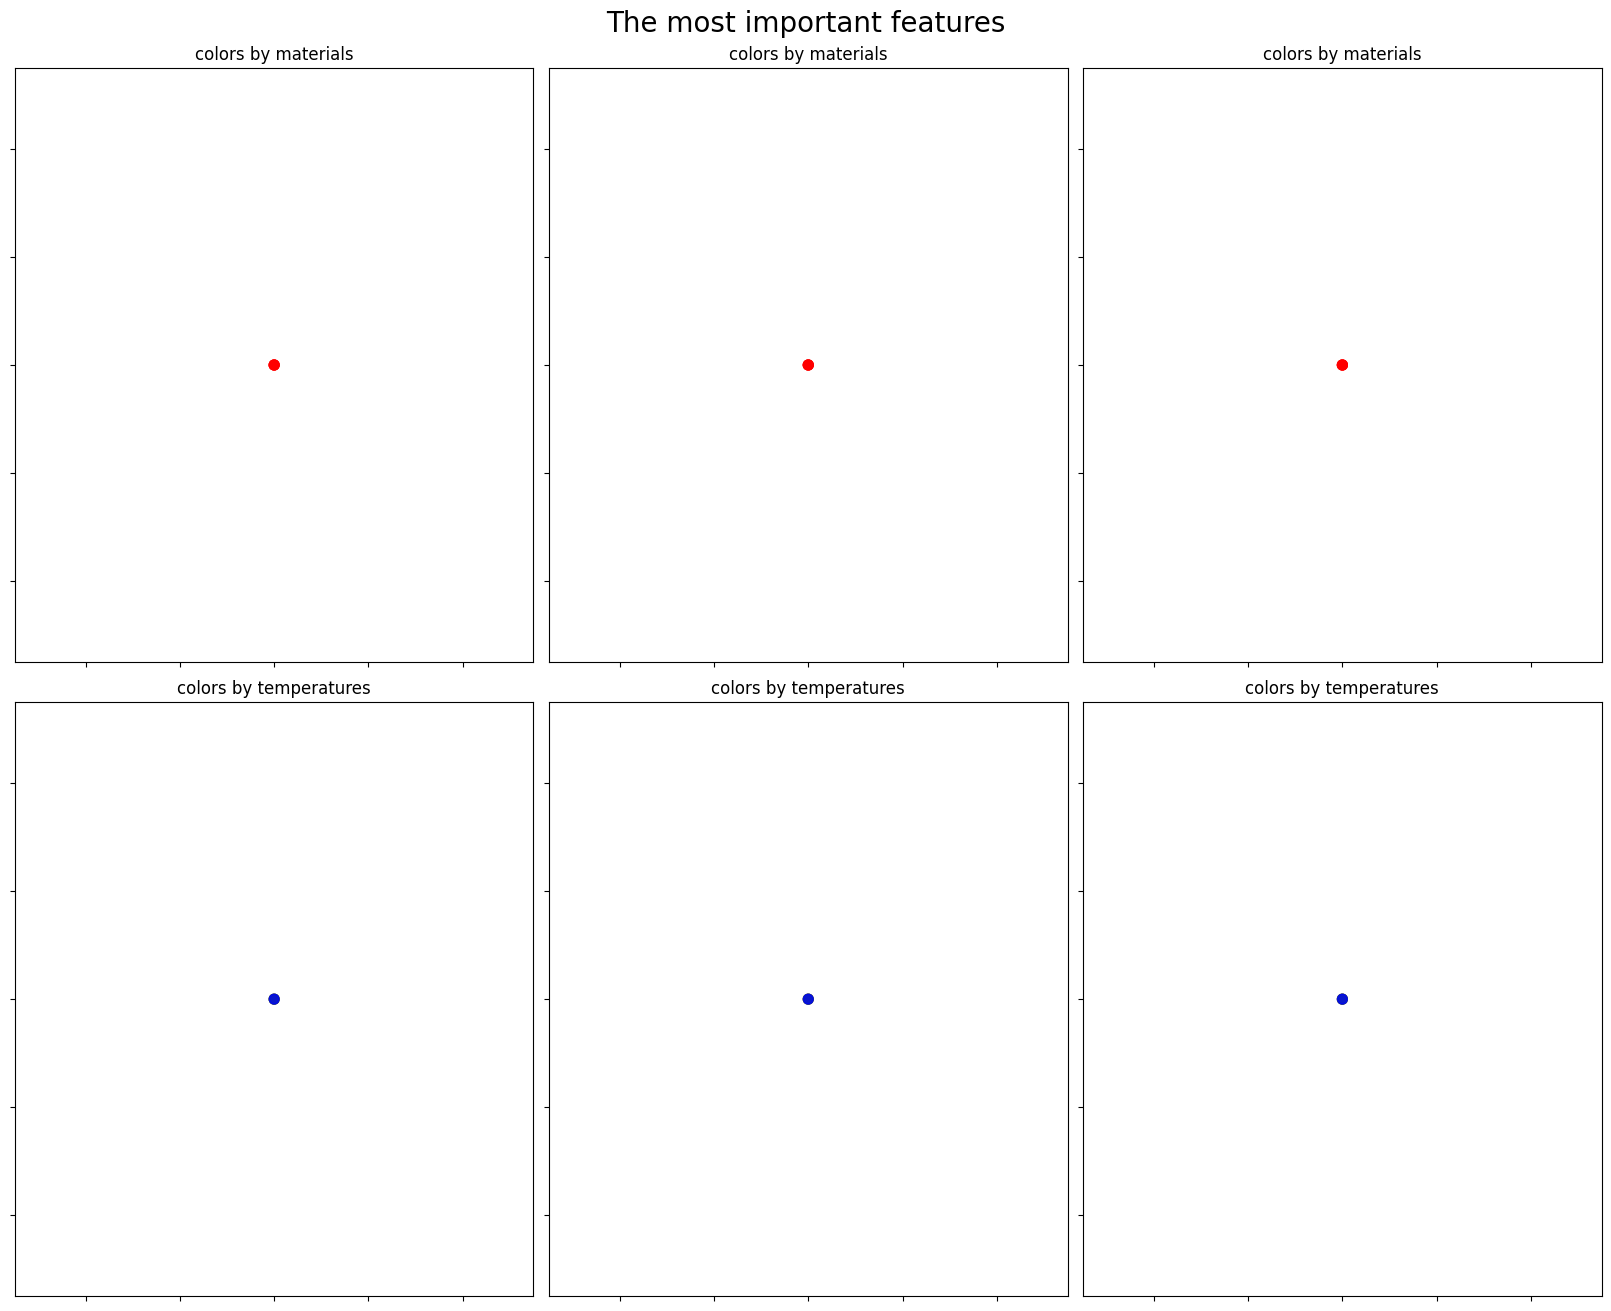

In [47]:
fig, axs = plt.subplots(
    nrows=2, ncols=3, figsize=(16, 13), facecolor="white", constrained_layout=True
)

fig.suptitle('The most important features', fontsize=20)

# df = df_all_temps[df_all_temps['src_id'].isin(src_id_unique)]

df = df_all_temps[df_all_temps['src_id'] == 245988]
df['colors'] = df['stru_id'].apply(lambda x: traj_color[x])
colors = df['colors'].to_list()

df['colors'] = df['temp']

X, y = (df.drop(['stru_label', 'stru_id', 'temp', 'src_id', 'label', 'is_good', 'colors'], axis=1), df['is_good'])
target_color = df['temp'].apply(lambda x: color(x))
# traj_color = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# traj_color = list(traj_color.keys())
# shuffle(traj_color)
# traj_color = traj_color[:len(y)]
X_scaled = scaler.fit_transform(X)
y = y.astype(int)
x_1 = X_scaled[:, first_feature]
x_2 = X_scaled[:, second_feature]
x_3 = X_scaled[:, third_feature]

add_2d_scatter(axs[0][0], np.array([x_2, x_1]), colors, "colors by materials")
add_2d_scatter(axs[0][1], np.array([x_1, x_3]), colors, "colors by materials")
add_2d_scatter(axs[0][2], np.array([x_2, x_3]), colors, "colors by materials")
    
add_2d_scatter(axs[1][0], np.array([x_2, x_1]), target_color, "colors by temperatures")
add_2d_scatter(axs[1][1], np.array([x_1, x_3]), target_color, "colors by temperatures")
add_2d_scatter(axs[1][2], np.array([x_2, x_3]), target_color, "colors by temperatures")


In [21]:
aaaaaaaaaaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaaaaaaaaaa' is not defined

In [ ]:
print(x_1.shape, y.shape)

(191,) (191,)


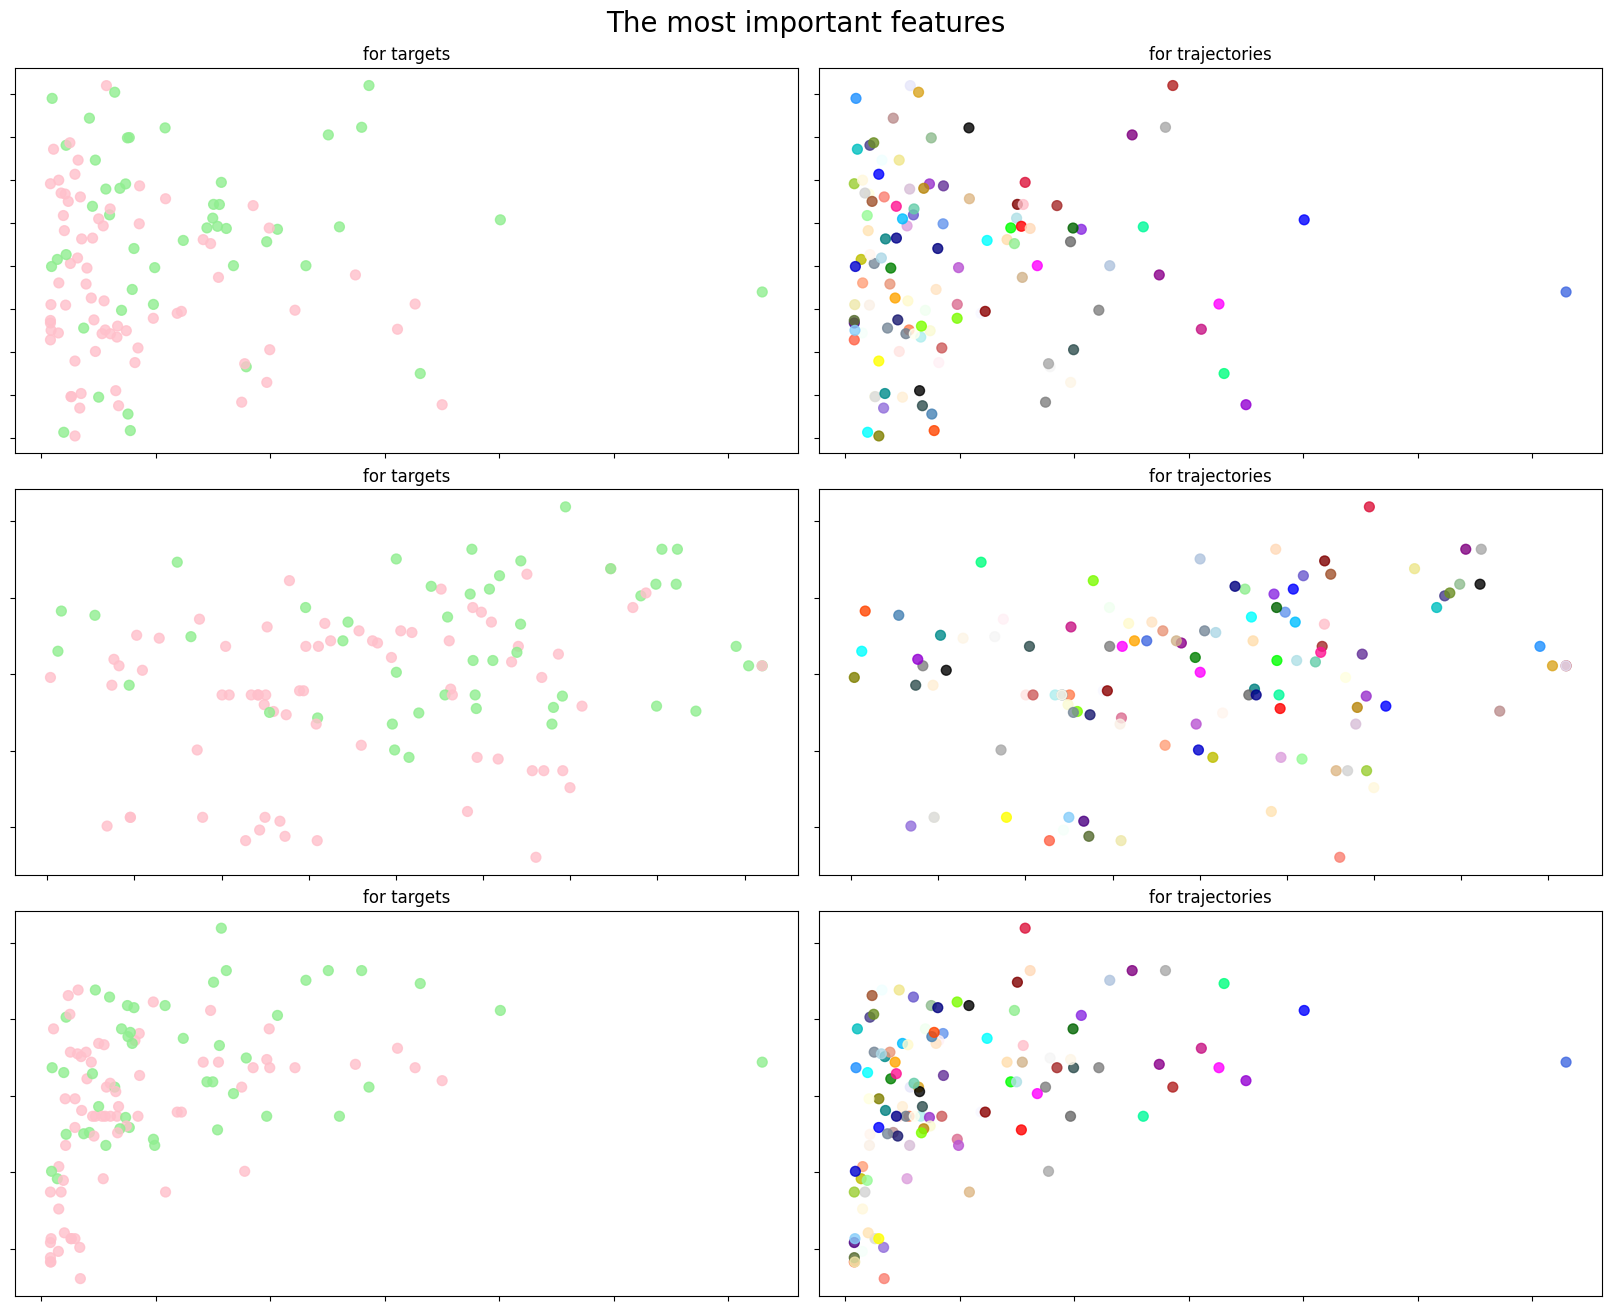

In [ ]:
# fig, axs = plt.subplots(
#     nrows=3, ncols=2, figsize=(16, 13), facecolor="white", constrained_layout=True
# )

fig.suptitle('The most important features', fontsize=20)
X, y = (df.drop(['is_good', 'stru_label', 'stru_id', 'barrier'], axis=1), df['is_good'])
X_scaled = scaler.fit_transform(X)
x_1 = X_scaled[:, first_feature]
x_2 = X_scaled[:, second_feature]
x_3 = X_scaled[:, third_feature]
add_2d_scatter(axs[0][0], np.array([x_2, x_1]), target_color, "for targets")
add_2d_scatter(axs[1][0], np.array([x_1, x_3]), target_color, "for targets")
add_2d_scatter(axs[2][0], np.array([x_2, x_3]), target_color, "for targets")

add_2d_scatter(axs[0][1], np.array([x_2, x_1]), traj_color, "for trajectories")
add_2d_scatter(axs[1][1], np.array([x_1, x_3]), traj_color, "for trajectories")
add_2d_scatter(axs[2][1], np.array([x_2, x_3]), traj_color, "for trajectories")
    

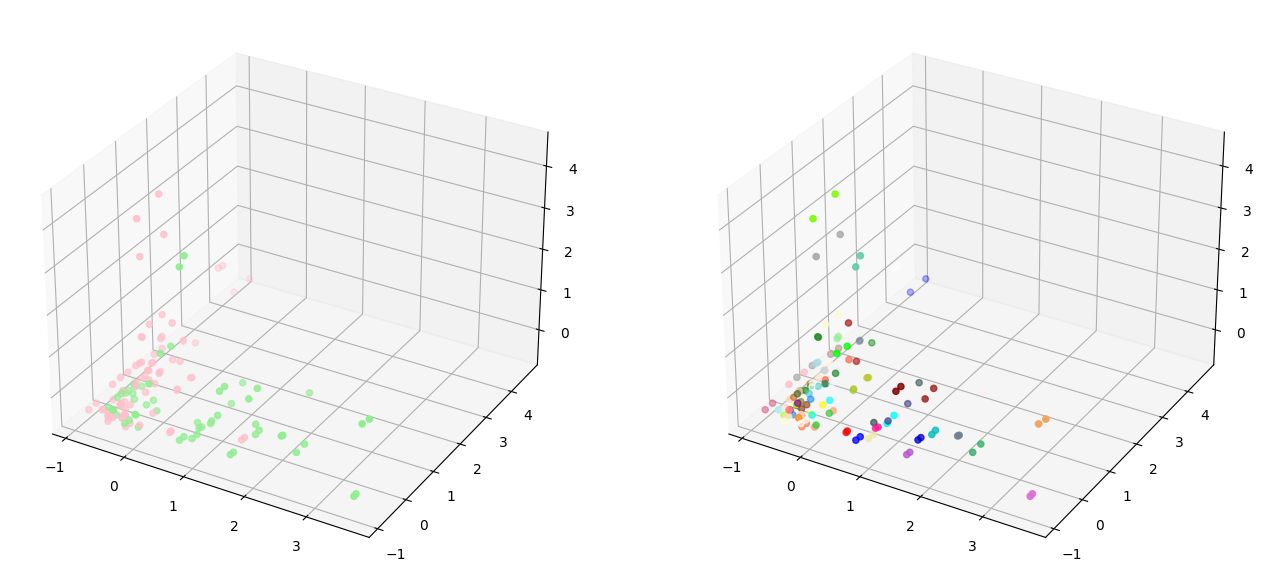

In [ ]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

for i in [0, 14]:
    X, y = (dfs[i].drop(['is_good', 'stru_label'], axis=1), dfs[i]['is_good'])
    X_scaled = scaler.fit_transform(X)
    y_pred = model.predict_proba(X_tr)[:, 1]
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
    X_tr = np.array(X_tr)
    X_te = np.array(X_te)
    colors = ['lightgreen' if v >= 0.5 else 'pink' for v in y_pred]
    axs[0].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = target_color) 
    axs[1].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = traj_color) 

In [ ]:
first_feature, second_feature, third_feature = np.argsort(model.get_feature_importance())[::-1][3:6]

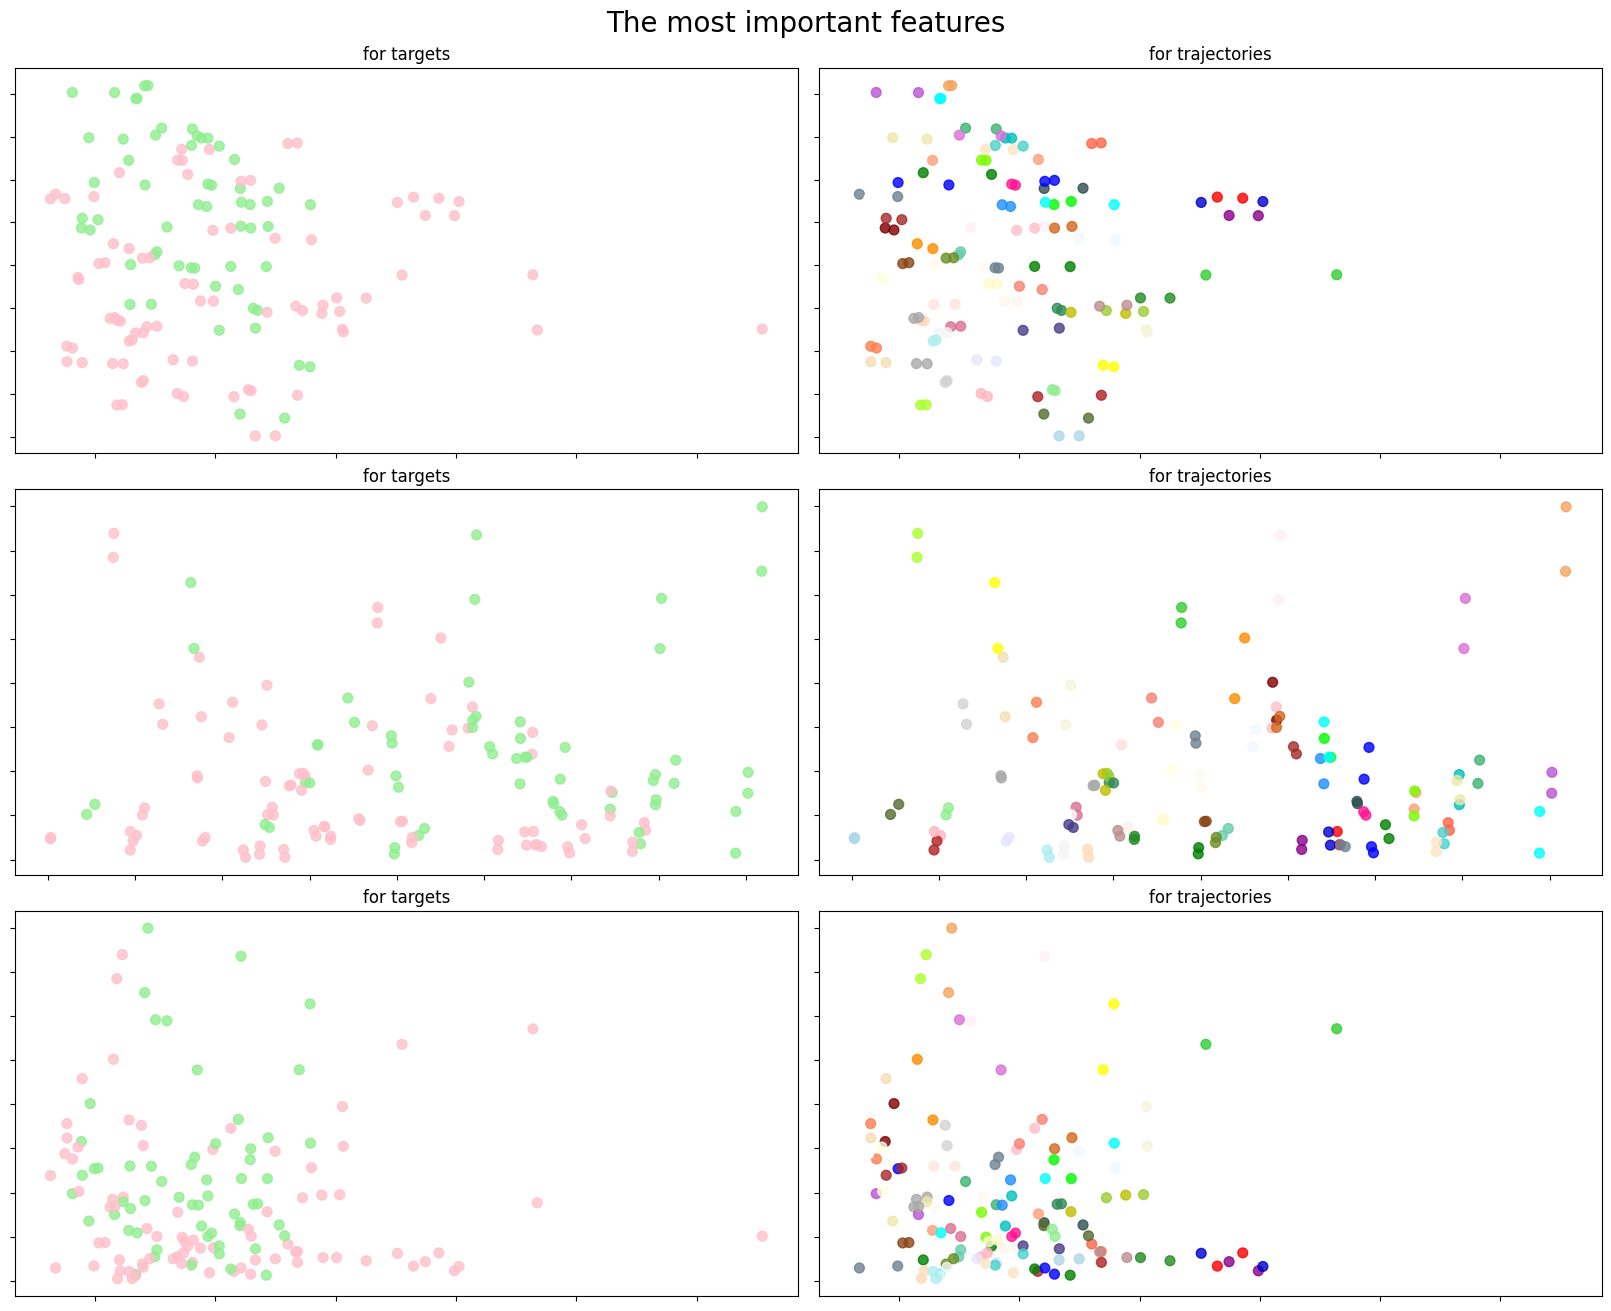

In [ ]:
fig, axs = plt.subplots(
    nrows=3, ncols=2, figsize=(16, 13), facecolor="white", constrained_layout=True
)

fig.suptitle('The most important features', fontsize=20)

for i in [0, 14]:
    X, y = (dfs[i].drop(['is_good', 'stru_label'], axis=1), dfs[i]['is_good'])
    X_scaled = scaler.fit_transform(X)
    y_pred = model.predict_proba(X_tr)[:, 1]
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
    X_tr = np.array(X_tr)
    X_te = np.array(X_te)
    x_1 = X_tr[:, first_feature]
    x_2 = X_tr[:, second_feature]
    x_3 = X_tr[:, third_feature]
    add_2d_scatter(axs[0][0], np.array([x_2, x_1]), target_color, "for targets")
    add_2d_scatter(axs[1][0], np.array([x_1, x_3]), target_color, "for targets")
    add_2d_scatter(axs[2][0], np.array([x_2, x_3]), target_color, "for targets")

    add_2d_scatter(axs[0][1], np.array([x_2, x_1]), traj_color, "for trajectories")
    add_2d_scatter(axs[1][1], np.array([x_1, x_3]), traj_color, "for trajectories")
    add_2d_scatter(axs[2][1], np.array([x_2, x_3]), traj_color, "for trajectories")
    

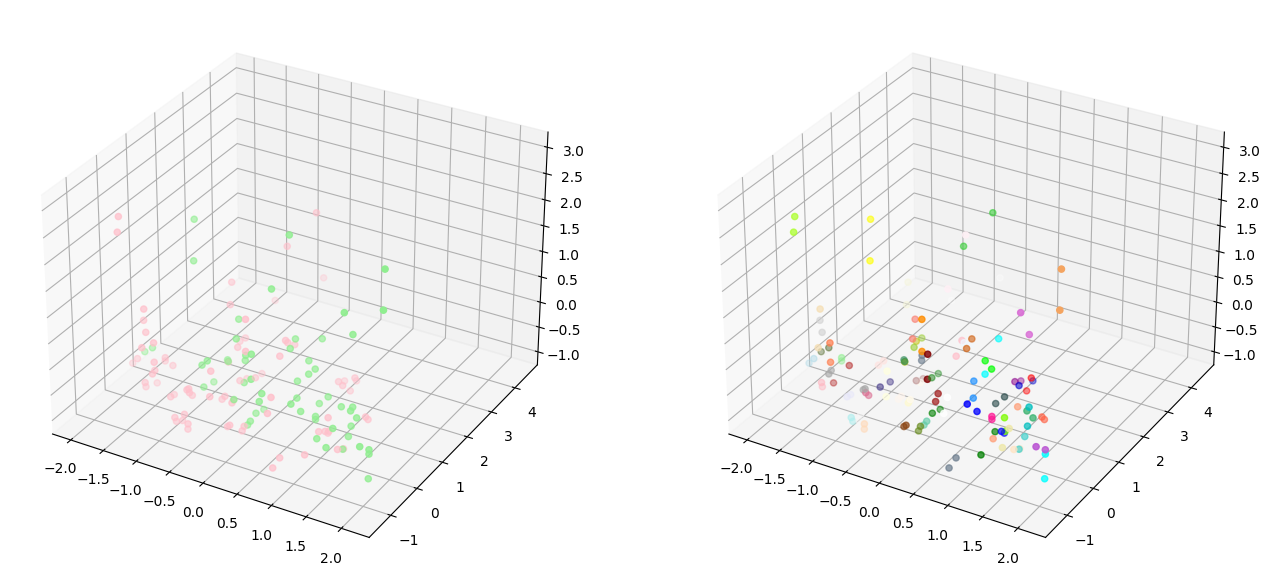

In [ ]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

for i in [0, 14]:
    X, y = (dfs[i].drop(['is_good', 'stru_label'], axis=1), dfs[i]['is_good'])
    X_scaled = scaler.fit_transform(X)
    y_pred = model.predict_proba(X_tr)[:, 1]
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
    X_tr = np.array(X_tr)
    X_te = np.array(X_te)
    colors = ['lightgreen' if v >= 0.5 else 'pink' for v in y_pred]
    axs[0].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = target_color) 
    axs[1].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = traj_color) 

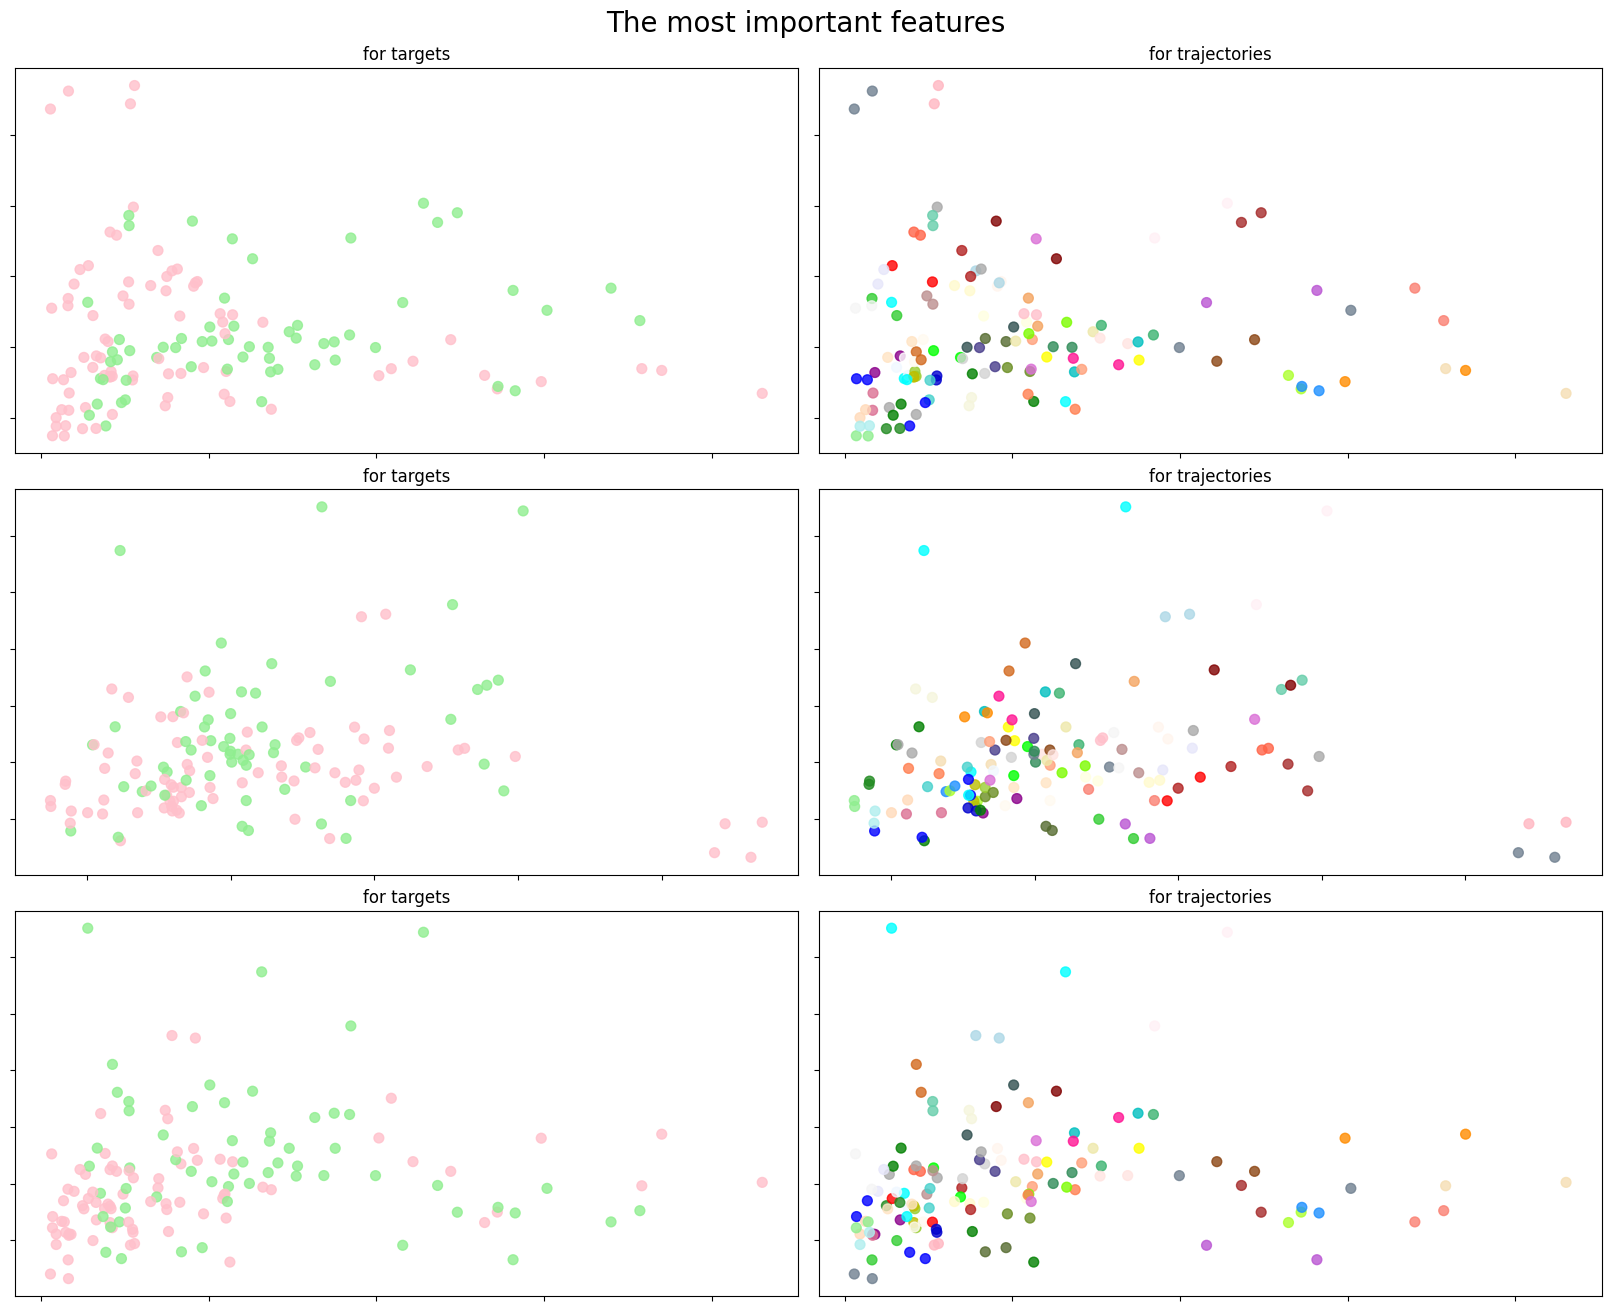

In [ ]:
first_feature, second_feature, third_feature = np.argsort(model.get_feature_importance())[::-1][6:9]


fig, axs = plt.subplots(
    nrows=3, ncols=2, figsize=(16, 13), facecolor="white", constrained_layout=True
)

fig.suptitle('The most important features', fontsize=20)

for i in [0, 14]:
    X, y = (dfs[i].drop(['is_good', 'stru_label'], axis=1), dfs[i]['is_good'])
    X_scaled = scaler.fit_transform(X)
    y_pred = model.predict_proba(X_tr)[:, 1]
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
    X_tr = np.array(X_tr)
    X_te = np.array(X_te)
    x_1 = X_tr[:, first_feature]
    x_2 = X_tr[:, second_feature]
    x_3 = X_tr[:, third_feature]
    add_2d_scatter(axs[0][0], np.array([x_2, x_1]), target_color, "for targets")
    add_2d_scatter(axs[1][0], np.array([x_1, x_3]), target_color, "for targets")
    add_2d_scatter(axs[2][0], np.array([x_2, x_3]), target_color, "for targets")

    add_2d_scatter(axs[0][1], np.array([x_2, x_1]), traj_color, "for trajectories")
    add_2d_scatter(axs[1][1], np.array([x_1, x_3]), traj_color, "for trajectories")
    add_2d_scatter(axs[2][1], np.array([x_2, x_3]), traj_color, "for trajectories")
    

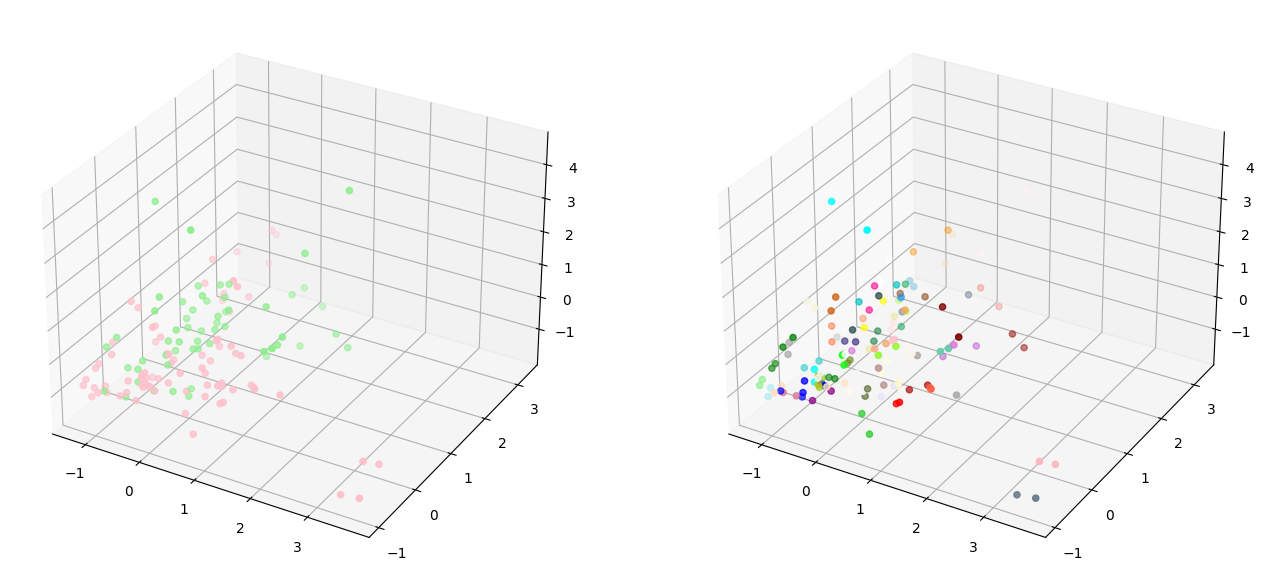

In [ ]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

for i in [0, 14]:
    X, y = (dfs[i].drop(['is_good', 'stru_label'], axis=1), dfs[i]['is_good'])
    X_scaled = scaler.fit_transform(X)
    y_pred = model.predict_proba(X_tr)[:, 1]
    X_tr, X_te, y_tr, y_te = train_test_split(X_scaled, y, test_size=0.4, random_state=random_split)
    X_tr = np.array(X_tr)
    X_te = np.array(X_te)
    colors = ['lightgreen' if v >= 0.5 else 'pink' for v in y_pred]
    axs[0].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = target_color) 
    axs[1].scatter3D(X_tr[:, first_feature], X_tr[:, second_feature], X_tr[:, third_feature], color = traj_color) 

In [ ]:
for i in range(15):
    dfs[i].to_csv(f'embeddings/embeddings_{i}.csv', index=False)